In [1]:
import numpy as np
from datetime import datetime
import time
from mpl_toolkits.axes_grid1 import host_subplot
import mpl_toolkits.axisartist as AA
import matplotlib.pyplot as plt

TIME_FMT = "%m/%d/%Y %H:%M:%S"

#ENTER YOUR DEVICE ID
#device_id = "****************"
repo = TimeSeriesRepo(device_id)


#Enter sensor name and channel name for first channel
first_sen = "3DM-GX4-45"
first_chan = "Lat"

#Enter time ranges for first channel.  MUST BE UTC.
first_startTime = "05/14/2015 20:36:32"
first_endTime = "05/14/2015 20:46:32"

#enter sensor name and channel for the second channel
second_sen = "3DM-GX4-45"
second_chan = "Long"

#enter time ranges for second channel.  MUST BE UTC.
second_startTime = "05/14/2015 20:38:29"
second_endTime = "05/14/2015 20:48:29"


In [2]:
first_start = long(time.mktime(datetime.strptime(first_startTime, TIME_FMT).timetuple()) * 1e9)
first_end = long(time.mktime(datetime.strptime(first_endTime, TIME_FMT).timetuple()) * 1e9)
first_chan_series = repo.getAllTimeSeries(first_sen, first_chan, startTime=first_start, endTime=first_end)

second_start = long(time.mktime(datetime.strptime(second_startTime, TIME_FMT).timetuple()) * 1e9)
second_end = long(time.mktime(datetime.strptime(second_endTime, TIME_FMT).timetuple()) * 1e9)
second_chan_series = repo.getAllTimeSeries(second_sen, second_chan, startTime=second_start, endTime=second_end)

In [4]:
series1 = first_chan_series[0]
times1 = np.array(series1.getTimeStamps())
#convert timestamps into seconds for plotting
start1 = times1[0]
times1 = (times1 - start1)/1e9
#Get timeseries out of the data
values1 = np.array(series1.getData())

series2 = second_chan_series[0]
times2 = np.array(series2.getTimeStamps())
#convert timestamps into seconds for plotting
start2 = times2[0]
times2 = (times2 - start2)/1e9
#Get timeseries out of the data
values2 = np.array(series2.getData())

times = np.append(times1, times2)

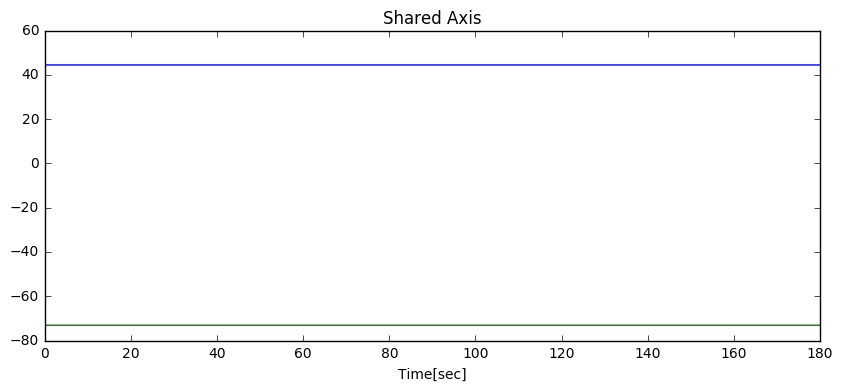

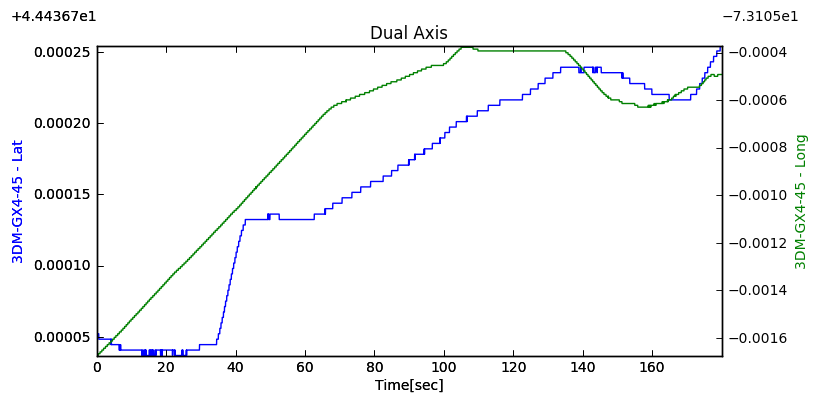

In [10]:
first_label = "%s - %s" % (first_sen, first_chan)
second_label = "%s - %s" % (second_sen, second_chan)
matplotlib.rcParams['figure.figsize'] = (10,4)
matplotlib.rcParams['savefig.dpi'] = 100
plt.figure(1)
plt.plot(times1, values1, label = first_label)
plt.plot(times2, values2, label = second_label)
plt.title("Shared Axis")
plt.xlabel('Time[sec]')

plt.figure(2)
host = host_subplot(111, axes_class=AA.Axes)
plt.subplots_adjust(right=0.75)

par1 = host.twinx()

offset = 60

plt.title("Dual Axis")
host.set_xlim(min(times), max(times))
host.set_ylim(min(values1), max(values1))

host.set_xlabel("Time[sec]")
host.set_ylabel(first_label)
par1.set_ylabel(second_label)

p1, = host.plot(times1, values1, label=first_label)
p2, = par1.plot(times2, values2, label=second_label)

par1.set_ylim(min(values2), max(values2))


host.axis["left"].label.set_color(p1.get_color())
par1.axis["right"].label.set_color(p2.get_color())

plt.draw()
plt.show()
